# Representation 2
## Practical Exercises

### Exercise 1
In this exercise, we compare linear with polynomial SVM and RBF SVM on the handwritten digit dataset.

Run the experiment and comment on the results. 


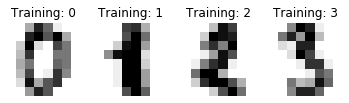

C:\Users\shiwei\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\shiwei\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\shiwei\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\shiwei\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\shiwei\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base

Linear SVM: 0.9647222222222223


C:\Users\shiwei\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\shiwei\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\shiwei\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\U

Polynomial SVM: 0.9888888888888889
RBF SVM: 0.9930555555555557


In [5]:
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn import svm

digits = load_digits()

# Look at the digits visually
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(1, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)
plt.show()

# Cross validation with 10 iterations
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

# Print CV error
linSVM = svm.LinearSVC(loss='hinge', C=0.005, random_state = 42)
scores_lin = cross_val_score(linSVM, digits.data, digits.target, cv=cv)
print("Linear SVM: " + repr(scores_lin.mean()))

polySVM = svm.SVC(kernel='poly', degree=3, C=1)
scores_poly = cross_val_score(polySVM, digits.data, digits.target, cv=cv)
print("Polynomial SVM: " + repr(scores_poly.mean()))

rbfSVM = svm.SVC(kernel='rbf', gamma=0.001, C=1)
scores_rbf = cross_val_score(rbfSVM, digits.data, digits.target, cv=cv)
print("RBF SVM: " + repr(scores_rbf.mean()))


### Exercise 3
Support vector regression (SVR) uses the $\epsilon$-insensitive loss function which does not penalize points within $\epsilon$ of the true value and penalizes points linearly beyond that. The loss function can similarly produce sparse solutions.

In the experiment (from http://scikit-learn.org/stable/auto_examples/plot_kernel_ridge_regression.html), we compare SVR with kernel ridge regression (KRR) which uses the square rather than $\epsilon$-insensitive loss. Provide your answer to the questions below in Archipelago before running the experiment.

For training, which of SVR or KRR will be faster, and why? For prediction, which of SVR or KRR will be faster and why?

SVR complexity and bandwidth selected and model fitted in 0.458 s
KRR complexity and bandwidth selected and model fitted in 0.276 s
Support vector ratio: 0.3200
SVR prediction for 100000 inputs in 0.052 s
KRR prediction for 100000 inputs in 0.192 s


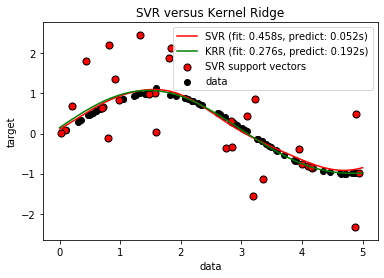

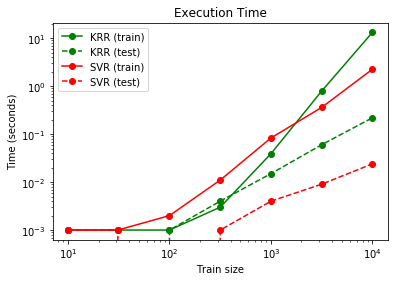

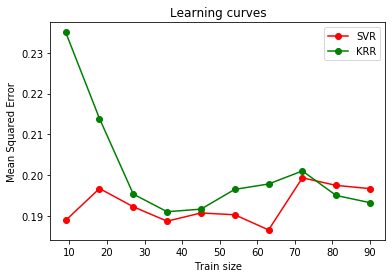

In [2]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
import time
import matplotlib.pyplot as plt

rng = np.random.RandomState(0)

# #############################################################################
# Generate sample data
X = 5 * rng.rand(10000, 1)
y = np.sin(X).ravel()

# Add noise to targets
y[::5] += 3 * (0.5 - rng.rand(X.shape[0] // 5))

X_plot = np.linspace(0, 5, 100000)[:, None]

# #############################################################################
# Fit regression model
train_size = 100
svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1), cv=5,
                   param_grid={"C": [1e0, 1e1, 1e2, 1e3],
                               "gamma": np.logspace(-2, 2, 5)})

kr = GridSearchCV(KernelRidge(kernel='rbf', gamma=0.1), cv=5,
                  param_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3],
                              "gamma": np.logspace(-2, 2, 5)})

t0 = time.time()
svr.fit(X[:train_size], y[:train_size])
svr_fit = time.time() - t0
print("SVR complexity and bandwidth selected and model fitted in %.3f s"
      % svr_fit)

t0 = time.time()
kr.fit(X[:train_size], y[:train_size])
kr_fit = time.time() - t0
print("KRR complexity and bandwidth selected and model fitted in %.3f s"
      % kr_fit)

sv_ratio = float(svr.best_estimator_.support_.shape[0])/train_size
print("Support vector ratio: %.4f" % sv_ratio)

t0 = time.time()
y_svr = svr.predict(X_plot)
svr_predict = time.time() - t0
print("SVR prediction for %d inputs in %.3f s"
      % (X_plot.shape[0], svr_predict))

t0 = time.time()
y_kr = kr.predict(X_plot)
kr_predict = time.time() - t0
print("KRR prediction for %d inputs in %.3f s"
      % (X_plot.shape[0], kr_predict))


# #############################################################################
# Look at the results
sv_ind = svr.best_estimator_.support_
plt.scatter(X[sv_ind], y[sv_ind], c='r', s=50, label='SVR support vectors',
            zorder=2, edgecolors=(0, 0, 0))
plt.scatter(X[:100], y[:100], c='k', label='data', zorder=1,
            edgecolors=(0, 0, 0))
plt.plot(X_plot, y_svr, c='r',
         label='SVR (fit: %.3fs, predict: %.3fs)' % (svr_fit, svr_predict))
plt.plot(X_plot, y_kr, c='g',
         label='KRR (fit: %.3fs, predict: %.3fs)' % (kr_fit, kr_predict))
plt.xlabel('data')
plt.ylabel('target')
plt.title('SVR versus Kernel Ridge')
plt.legend()

# Visualize training and prediction time
plt.figure()

# Generate sample data
X = 5 * rng.rand(10000, 1)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(X.shape[0] // 5))
sizes = np.logspace(1, 4, 7, dtype=np.int)
for name, estimator in {"KRR": KernelRidge(kernel='rbf', alpha=0.1,
                                           gamma=10),
                        "SVR": SVR(kernel='rbf', C=1e1, gamma=10)}.items():
    train_time = []
    test_time = []
    for train_test_size in sizes:
        t0 = time.time()
        estimator.fit(X[:train_test_size], y[:train_test_size])
        train_time.append(time.time() - t0)

        t0 = time.time()
        estimator.predict(X_plot[:1000])
        test_time.append(time.time() - t0)

    plt.plot(sizes, train_time, 'o-', color="r" if name == "SVR" else "g",
             label="%s (train)" % name)
    plt.plot(sizes, test_time, 'o--', color="r" if name == "SVR" else "g",
             label="%s (test)" % name)

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Train size")
plt.ylabel("Time (seconds)")
plt.title('Execution Time')
plt.legend(loc="best")

# Visualize learning curves
plt.figure()

svr = SVR(kernel='rbf', C=1e1, gamma=0.1)
kr = KernelRidge(kernel='rbf', alpha=0.1, gamma=0.1)
train_sizes, train_scores_svr, test_scores_svr = \
    learning_curve(svr, X[:100], y[:100], train_sizes=np.linspace(0.1, 1, 10),
                   scoring="neg_mean_squared_error", cv=10)
train_sizes_abs, train_scores_kr, test_scores_kr = \
    learning_curve(kr, X[:100], y[:100], train_sizes=np.linspace(0.1, 1, 10),
                   scoring="neg_mean_squared_error", cv=10)

plt.plot(train_sizes, -test_scores_svr.mean(1), 'o-', color="r",
         label="SVR")
plt.plot(train_sizes, -test_scores_kr.mean(1), 'o-', color="g",
         label="KRR")
plt.xlabel("Train size")
plt.ylabel("Mean Squared Error")
plt.title('Learning curves')
plt.legend(loc="best")

plt.show()

### Exercise 7

In this experiment, we will try to learn PARITY with a single hidden layer neural network. We will use input size of 10 and 11 hidden units (which we know to be sufficient to represent PARITY). The training set and test set sizes are 1000. We do 10 runs with random initialization using the lbfgs solver in Scikit Learn.

Before running the algorithm, write down what you expect to see. 

Change some of the parameters, e.g. train_size to 10000, the solver to 'sgd' and 'adam', the number of hidden units, etc. and rerun.

In [3]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

train_size = 1000
test_size = 1000
input_size = 10

np.random.seed(0)

for i in range(0,10):
    train_data = np.random.randint(2,size=(train_size,input_size))
    train_label = train_data.sum(axis=1)%2
    test_data = np.random.randint(2,size=(test_size,input_size))
    test_label = test_data.sum(axis=1)%2 # compute PARITY

    mlp = MLPClassifier(solver='lbfgs', alpha=1e-8, activation = 'logistic', hidden_layer_sizes=(11), random_state=0)
    mlp.fit(train_data, train_label)
    predict = mlp.predict(test_data)
    accuracy = accuracy_score(test_label, predict)
    print("MLP accuracy on PARITY: " + "{0:.2f}".format(accuracy))

MLP accuracy on PARITY: 0.87
MLP accuracy on PARITY: 0.65
MLP accuracy on PARITY: 0.75
MLP accuracy on PARITY: 0.62
MLP accuracy on PARITY: 0.81
MLP accuracy on PARITY: 0.71
MLP accuracy on PARITY: 0.83
MLP accuracy on PARITY: 0.91
MLP accuracy on PARITY: 0.86
MLP accuracy on PARITY: 0.80


### Exercise 7
In this experiment, we implement Eigenfaces: do PCA then nearest neighbour classification.

Try different number of PCA components (20, 40 80) and whether whitening is done. What effects do they have on nearest neighbour accuracy? Why?

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\shiwei\scikit_learn_data
Dataset consists of 400 faces
Extracting the top 20 eigenfaces from 400 faces
done in 0.107s


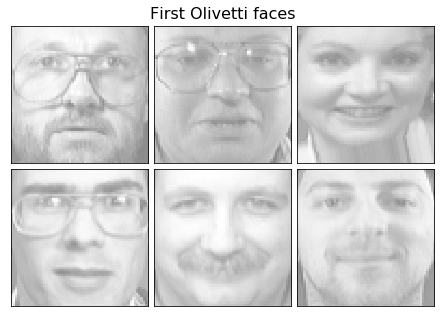

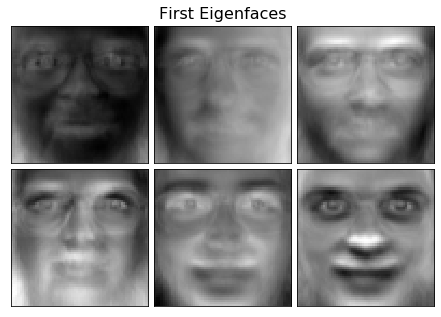

Original: 0.8472500000000001
PCA: 0.8827499999999999


In [4]:
# The following is adapted from http://scikit-learn.org/stable/_downloads/plot_faces_decomposition.py

# Authors: Vlad Niculae, Alexandre Gramfort
# License: BSD 3 clause
from sklearn import neighbors
import logging
from time import time

from numpy.random import RandomState
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn.cluster import MiniBatchKMeans
from sklearn import decomposition
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(levelname)s %(message)s')
n_row, n_col = 2, 3
image_shape = (64, 64)
rng = RandomState(0)

dataset = fetch_olivetti_faces(shuffle=True, random_state=rng)
faces = dataset.data
labels = dataset.target

n_samples, n_features = faces.shape

print("Dataset consists of %d faces" % n_samples)

# Vary this to experiment with the number of components used in PCA
n_components = 20

print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, faces.shape[0]))
t0 = time()

# Change whiten=False to whiten=True to see the effect
pca = decomposition.PCA(n_components=n_components, svd_solver='randomized',
          whiten=True, random_state=42).fit(faces)
print("done in %0.3fs" % (time() - t0))

eigenfaces = pca.components_.reshape((n_components, 64, 64))

def plot_gallery(title, images, n_col=n_col, n_row=n_row):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape(image_shape), cmap=plt.cm.gray,
                   interpolation='nearest',
                   vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)
    
plot_gallery("First Olivetti faces", faces[:n_row*n_col])
plot_gallery("First Eigenfaces", eigenfaces[:n_row*n_col])
plt.show()

faces_pca = pca.transform(faces)

# Run 20 random splits
# Vary test_size (fraction used as test) to see the effect of number of labeled data on the accuracy
cv = ShuffleSplit(n_splits=20, test_size=0.5, random_state=0)
clf = neighbors.KNeighborsClassifier(n_neighbors=1, algorithm='brute')
scores = cross_val_score(clf, faces, labels, cv=cv)
print("Original: " + repr(scores.mean()))
scores = cross_val_score(clf, faces_pca, labels, cv=cv)
print("PCA: " + repr(scores.mean()))